Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00        23

    accuracy                           0.97        69
   macro avg       0.95      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69

Accuracy Score: 0.97


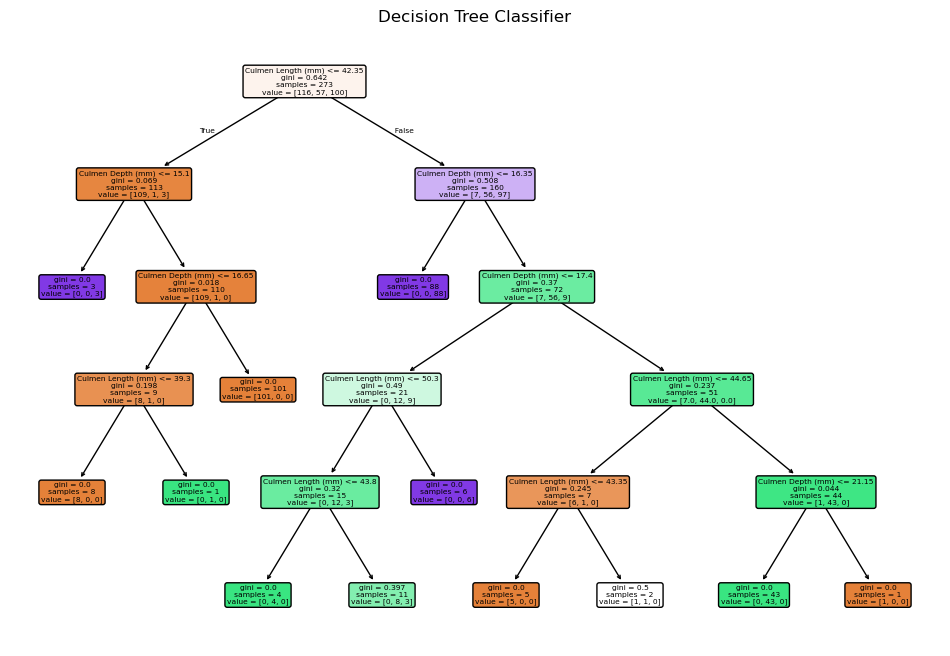

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

dataset = pd.read_csv("penguins_classification.csv")

features = ['Culmen Length (mm)', 'Culmen Depth (mm)']
X = dataset[features].values  
y = dataset['Species'].astype('category').cat.codes  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=features, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()
